In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
#import plotly.plotly as py
import plotly as py
from wordcloud import WordCloud, STOPWORDS

In [30]:


import os

path = os.path.join('c:' + os.sep, 'Users', 'hp', 'Downloads',  'tmdb-movies.csv')
reader = pd.read_csv(path)
reader.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [31]:
reader.head(2)



,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [32]:
reader.tail(2)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [33]:
reader.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [34]:
reader.isna().sum()



id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [36]:
reader.fillna(0)
print()

In [37]:
sum(reader.duplicated())


1

In [38]:
reader.drop_duplicates(inplace = True)


In [49]:
print("After Removing Duplicate Values (Rows,Columns) : ",reader.shape)


After Removing Duplicate Values (Rows,Columns) :  (10865, 15)


In [50]:
reader['release_date'] = pd.to_datetime(reader['release_date'])
reader['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

In [51]:
 
# Checking for an zero values in the budget and revenue columns
print("Rows With Zero Values In The Budget Column:",reader[(reader['budget']==0)].shape[0])
print("Rows With Zero Values In The Revenue Column:",reader[(reader['revenue']==0)].shape[0])

Rows With Zero Values In The Budget Column: 5696
Rows With Zero Values In The Revenue Column: 6016


In [56]:
#4 Highest and lowest revenue
def find_minmax(x):
    #use the function 'idmin' to find the index of lowest profit movie.
    min_index = reader[x].idxmin()
    #use the function 'idmax' to find the index of Highest profit movie.
    high_index = reader[x].idxmax()
    high = pd.DataFrame(reader.loc[high_index,:])
    low = pd.DataFrame(reader.loc[min_index,:])
    print("Movie Which Has Highest "+ x + " : ",reader['original_title'][high_index])
    print("Movie Which Has Lowest "+ x + "  : ",reader['original_title'][min_index])
    return pd.concat([high,low],axis = 1)

find_minmax('revenue')

Movie Which Has Highest revenue :  Avatar
Movie Which Has Lowest revenue  :  Wild Card


,1386,48
id,19995,265208
popularity,9.43277,2.93234
budget,237000000,30000000
revenue,2781505847,0
original_title,Avatar,Wild Card
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Jason Statham|Michael Angarano|Milo Ventimigli...
director,James Cameron,Simon West
keywords,culture clash|future|space war|space colony|so...,gambling|bodyguard|remake
runtime,162,92
genres,Action|Adventure|Fantasy|Science Fiction,Thriller|Crime|Drama


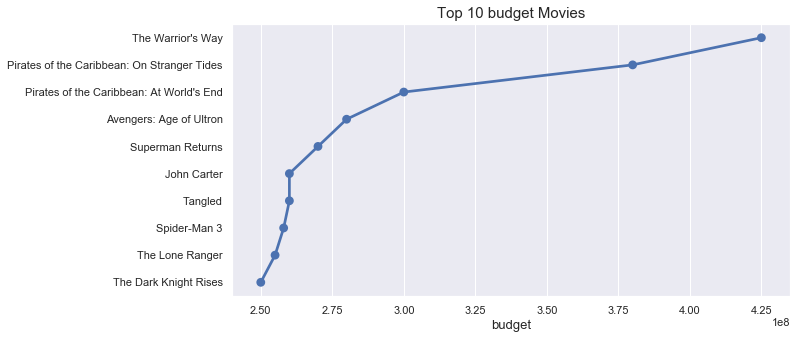

In [59]:
#Which are the movies with the third lowest and third highest budget?
info = pd.DataFrame(reader['budget'].sort_values(ascending = False))
info['original_title'] = reader['original_title']
data = list(map(str,(info['original_title'])))
x = list(data[:10])
y = list(info['budget'][:10])

#make a plot usinf pointplot for top 10 profitable movies.
ax = sns.pointplot(x=y,y=x)

#setup the figure size
sns.set(rc={'figure.figsize':(10,5)})
#setup the title and labels of the plot.
ax.set_title("Top 10 budget Movies",fontsize = 15)
ax.set_xlabel("budget",fontsize = 13)
sns.set_style("darkgrid")

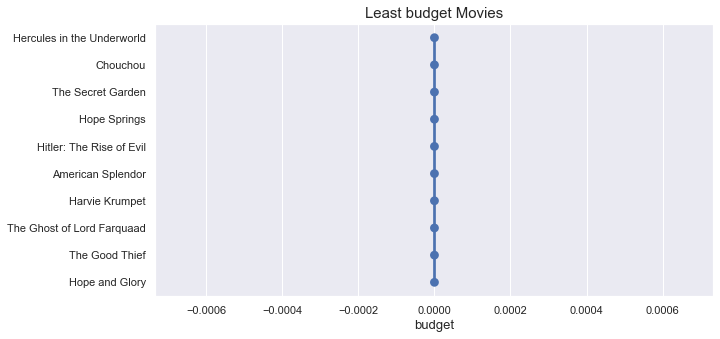

In [61]:
##Which are the movies with the third lowest and third highest budget?
info = pd.DataFrame(reader['budget'].sort_values(ascending = True))
info['original_title'] = reader['original_title']
data = list(map(str,(info['original_title'])))
x = list(data[:10])
y = list(info['budget'][:10])

#make a plot usinf pointplot for top 10 profitable movies.
ax = sns.pointplot(x=y,y=x)

#setup the figure size
sns.set(rc={'figure.figsize':(10,5)})
#setup the title and labels of the plot.
ax.set_title("Least budget Movies",fontsize = 15)
ax.set_xlabel("budget",fontsize = 13)
sns.set_style("darkgrid")

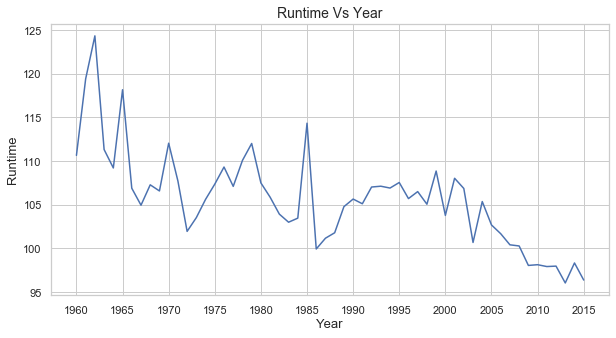

In [64]:
#how the runtime of the movies differ year to year.
#5) What is the average runtime of movies in the year 2006?
#make the group of the data according to their release_year and find the mean  related to this and plot.
reader.groupby('release_year').mean()['runtime'].plot(xticks = np.arange(1960,2016,5))

#setup the figure size.
sns.set(rc={'figure.figsize':(10,5)})

#setup the title of the figure
plt.title("Runtime Vs Year",fontsize = 14)

#setup the x-label and y-label of the plot.
plt.xlabel('Year',fontsize = 13)
plt.ylabel('Runtime',fontsize = 13)
sns.set_style("whitegrid")

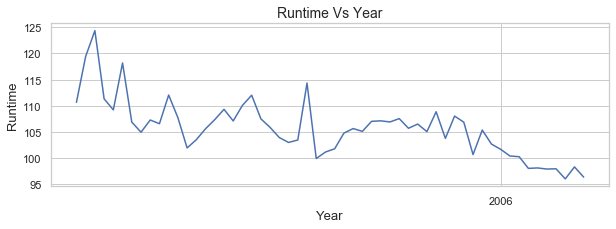

In [75]:
#2006
#5) What is the average runtime of movies in the year 2006?
#make the group of the data according to their release_year and find the mean  related to this and plot.
reader.groupby('release_year').mean()['runtime'].plot(xticks = np.arange(2006,2007,1))

#setup the figure size.
sns.set(rc={'figure.figsize':(10,5)})

#setup the title of the figure
plt.title("Runtime Vs Year",fontsize = 14)

#setup the x-label and y-label of the plot.
plt.xlabel('Year',fontsize = 13)
plt.ylabel('Runtime',fontsize = 13)
sns.set_style("whitegrid")

In [80]:
reader['letter_count'] = reader['original_title'].str.len()

In [81]:
reader['letter_count']

0        14
1        18
2         9
3        28
4         9
         ..
10861    18
10862    10
10863    19
10864    22
10865    24
Name: letter_count, Length: 10865, dtype: int64

In [84]:
reader['word_count'] = reader['original_title'].str.split().map(len)

In [86]:
reader[['original_title','word_count']].head()

,original_title,word_count
0,Jurassic World,2
1,Mad Max: Fury Road,4
2,Insurgent,1
3,Star Wars: The Force Awakens,5
4,Furious 7,2


Text(0.5, 0, 'Year')

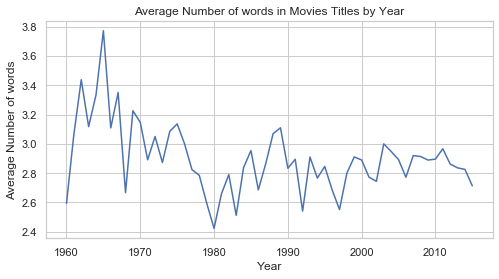

In [96]:
group_by_year = reader.groupby('release_year')
group_by_year['word_count'].mean().plot(kind='line', figsize=(8,4))
plt.title('Average Number of words in Movies Titles by Year')
plt.ylabel('Average Number of words')
plt.xlabel('Year')

Text(0.5, 0, 'Year')

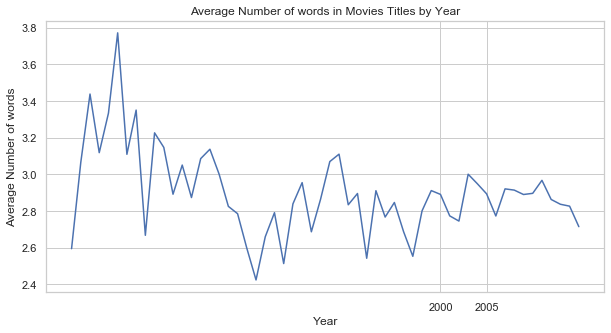

In [97]:
reader.groupby('release_year').mean()['word_count'].plot(xticks = np.arange(2000,2010,5))
plt.title('Average Number of words in Movies Titles by Year')
plt.ylabel('Average Number of words')
plt.xlabel('Year')

In [113]:
group_by_year = reader.groupby('release_year')
##group_by_year['genres'].count().plot(kind='line', figsize=(8,4))
#plt.title('Group by genres')
#plt.ylabel('cast')
#plt.xlabel('genre')
q= reader.cast.unique()
reader.pivot(index='cast',values='genres').plot(kind = 'bar')
plot.show

KeyError: None